In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

def parse_txt_df(data):
    df = pd.DataFrame([eval(x) for x in data])
    return df 

def open_txt(txt_dir: str) -> pd.DataFrame:
    with open(txt_dir,'r') as f:
        data= f.readlines()
    return parse_txt_df(data)

In [2]:
anomaly_ratio  = [0, 0.05, 0.1, 0.15]
query_strategy = ['entropy_sampling','random_sampling']
class_name     = ['leather', 'zipper' ,'metal_nut' ,'wood', 'pill' ,'grid', 'hazelnut' ,'toothbrush', 'screw' ,'carpet', 'all']
target_columns = ['eval_image_auroc','eval_pixel_auroc']

# 1. Base : Anomaly Ratio에 따른 성능 변화 - 학습 데이터에 Anomaly가 있는 경우 성능 변화 확인 

## 1.1 기본 성능 - basic one-class setting 

In [9]:
temp_list = [] 
for name in class_name:
    data_dir = f'results/benchmark/MVTecAD/STPM/resnet18/EntropySampling/{name}/al_ratio_0-query_10/'
    log_dir = os.path.join(data_dir, 'log.txt')
    df = open_txt(log_dir)

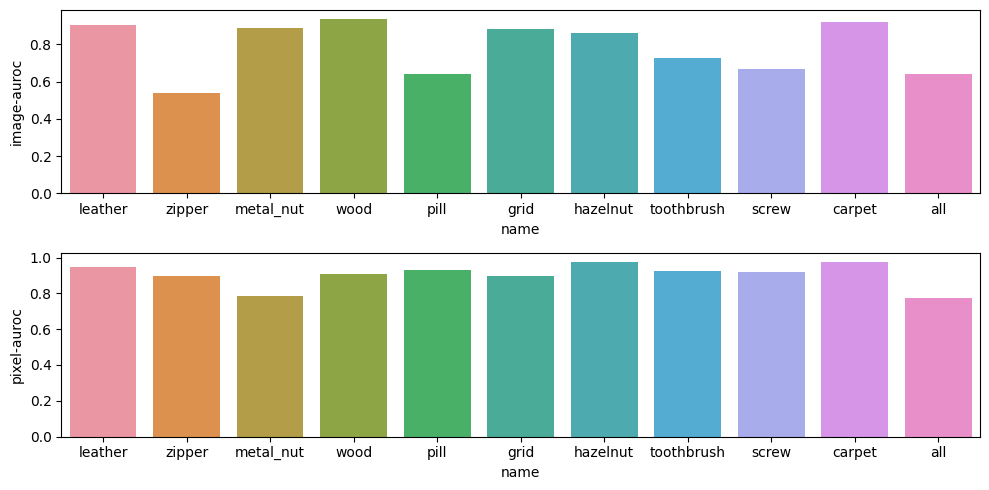

,name,image-auroc,pixel-auroc
0,leather,0.9066,0.9454
1,zipper,0.5407,0.8956
2,metal_nut,0.8876,0.7831
3,wood,0.9377,0.9101
4,pill,0.6429,0.9296
5,grid,0.8814,0.8956
6,hazelnut,0.8636,0.9739
7,toothbrush,0.7250,0.9268
8,screw,0.6690,0.9213
9,carpet,0.9189,0.9760


In [17]:
temp_list = [] 
for name in class_name:
    data_dir = f'results/benchmark/MVTecAD/STPM/resnet18/EntropySampling/{name}/al_ratio_0-query_10/'
    log_dir = os.path.join(data_dir, 'log.txt')
    df = open_txt(log_dir)
    temp_list.append([name, df[df['round'] == 0][target_columns].iloc[-1,:].values])

df = pd.DataFrame(np.array(temp_list, dtype='object')[:,0])
df = pd.concat([df, pd.DataFrame(np.vstack(pd.DataFrame(temp_list)[1].values))],axis=1)
df.columns = ['name','image-auroc','pixel-auroc']    
    

row = 2
col = 1 
figsize = (10,5)
fig, ax = plt.subplots(row, col, figsize=figsize)

sns.barplot(
    data = df,
    x = 'name',
    y = 'image-auroc',
    ax = ax[0]
)

sns.barplot(
    data = df,
    x = 'name',
    y = 'pixel-auroc',
    ax = ax[1]
)

plt.tight_layout()
plt.show()

df.head(20)

In [18]:
df.drop(10).mean(axis=0)

/tmp/ipykernel_25085/979841663.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(10).mean(axis=0)


image-auroc    0.79734
pixel-auroc    0.91574
dtype: float64

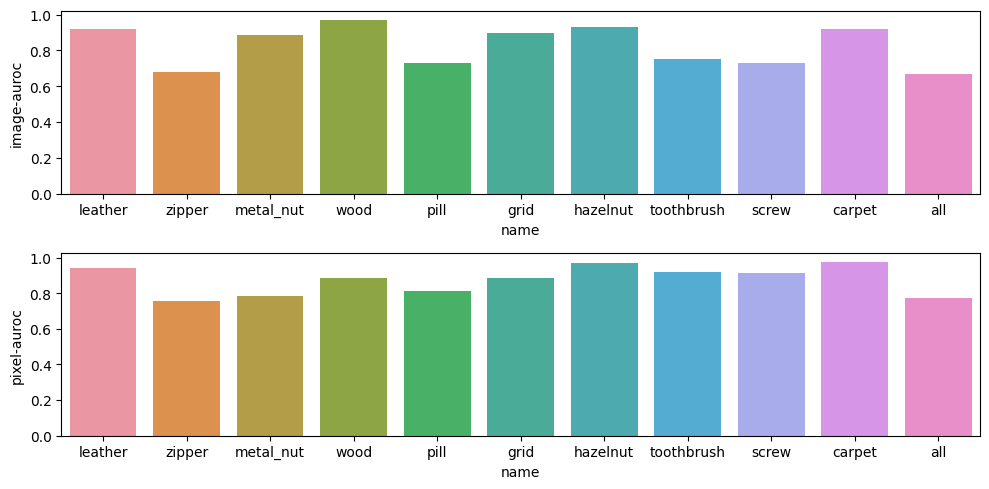

,name,image-auroc,pixel-auroc
0,leather,0.9219,0.9414
1,zipper,0.6804,0.7560
2,metal_nut,0.8876,0.7831
3,wood,0.9719,0.8833
4,pill,0.7286,0.8141
5,grid,0.8989,0.8873
6,hazelnut,0.9336,0.9709
7,toothbrush,0.7500,0.9195
8,screw,0.7317,0.9122
9,carpet,0.9222,0.9776


In [27]:
temp_list = [] 
for name in class_name:
    data_dir = f'results/benchmark/MVTecAD/STPM/resnet18/EntropySampling/{name}/al_ratio_0-query_10/'
    log_dir = os.path.join(data_dir, 'log.txt')
    df = open_txt(log_dir)
    df = df[df['round'] == 0]
    temp_list.append([name, df.iloc[df['eval_image_auroc'].argmax()][target_columns].values])

df = pd.DataFrame(np.array(temp_list, dtype='object')[:,0])
df = pd.concat([df, pd.DataFrame(np.vstack(pd.DataFrame(temp_list)[1].values))],axis=1)
df.columns = ['name','image-auroc','pixel-auroc']    
    

row = 2
col = 1 
figsize = (10,5)
n_starts = [100, 200, 300]
fig, ax = plt.subplots(row, col, figsize=figsize)

sns.barplot(
    data = df,
    x = 'name',
    y = 'image-auroc',
    ax = ax[0]
)

sns.barplot(
    data = df,
    x = 'name',
    y = 'pixel-auroc',
    ax = ax[1]
)

plt.tight_layout()
plt.show()

df.head(20)

In [28]:
df.drop(10).mean(axis=0)

/tmp/ipykernel_25085/979841663.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(10).mean(axis=0)


image-auroc    0.84268
pixel-auroc    0.88454
dtype: float64

## 1.2 anomaly ratio 에 따른 성능 변화

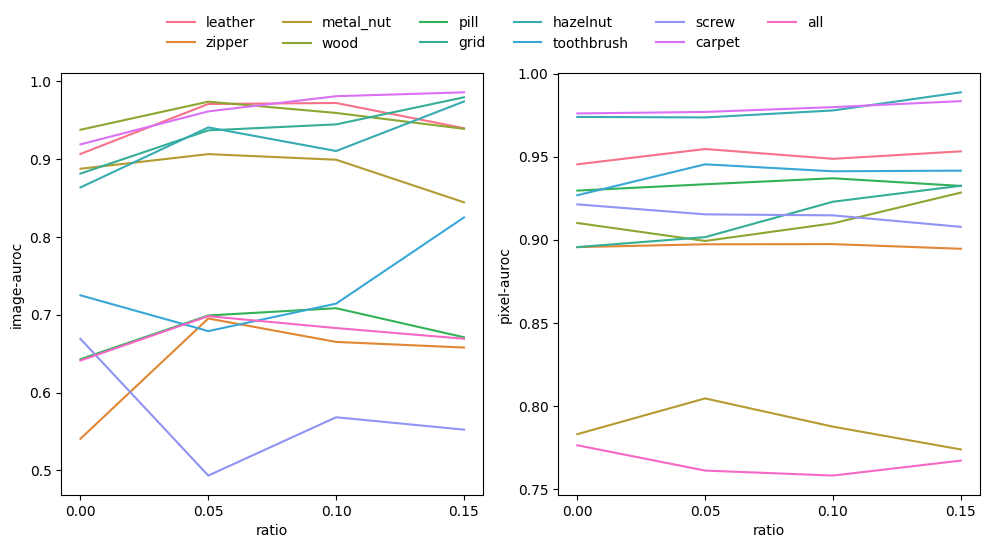

In [29]:

temp_list = [] 
for i, name in enumerate(class_name):
    for ratio in anomaly_ratio:
        data_dir = f'results/benchmark/MVTecAD/STPM/resnet18/EntropySampling/{name}/al_ratio_{ratio}-query_10/'
        log_dir = os.path.join(data_dir, 'log.txt')
        df = open_txt(log_dir)
        df = df[df['round'] == 0]
        temp_list.append([name, ratio, df[target_columns].iloc[-1,:].values])
        
df = pd.DataFrame(np.array(temp_list, dtype='object'))
df = pd.concat([df, pd.DataFrame(np.vstack(pd.DataFrame(temp_list)[1].values))],axis=1)
df.columns = ['name','ratio','image-auroc','pixel-auroc']    
df['pixel-auroc'] = df['image-auroc'].apply(lambda x: x[-1])
df['image-auroc'] = df['image-auroc'].apply(lambda x: x[0])


import matplotlib.pyplot as plt
import seaborn as sns

row = 1
col = 2
figsize = (10, 5)
fig, axes = plt.subplots(row, col, figsize=figsize)

for i, (ax, metric) in enumerate(zip(axes, ['image-auroc','pixel-auroc'])):

    plot = sns.lineplot(
        x    = 'ratio',
        y    = metric,
        hue  = 'name',
        data = df,
        ax   = ax
    )

    # Set the x ticks to the desired values
    ax.set_xticks(anomaly_ratio)

    # Get the handles and labels of the legend
    lines, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

    # Create the legend with modified colors
fig.legend(
        lines, labels, ncol=6, loc='lower center', bbox_to_anchor=(0.5, 0.98),
        frameon=False, fontsize=10,
    )

plt.tight_layout()
plt.show()


# round 에 따른 성능 변화 - anomaly ratio에 따라서 

In [129]:
temp[temp['ratio'] == 0.15]

,round,epoch,eval_image_auroc,eval_pixel_auroc,ratio,name
29,0,29,0.9397,0.9532,0.15,leather
59,1,29,0.9507,0.9469,0.15,leather
89,2,29,0.9345,0.9215,0.15,leather
119,3,29,0.9364,0.9385,0.15,leather
149,4,29,0.9369,0.9452,0.15,leather
...,...,...,...,...,...,...
179,5,29,0.6908,0.7675,0.15,all
209,6,29,0.6676,0.7771,0.15,all
239,7,29,0.6849,0.7668,0.15,all
269,8,29,0.6787,0.7605,0.15,all


In [132]:
df[df['ratio']==ratio]

,round,epoch,eval_image_auroc,eval_pixel_auroc,ratio,name
29,0,29,0.9066,0.9454,0.0,leather
59,1,29,0.9236,0.9515,0.0,leather
89,2,29,0.9518,0.9623,0.0,leather
119,3,29,0.8852,0.9343,0.0,leather
149,4,29,0.8825,0.9471,0.0,leather
...,...,...,...,...,...,...
179,5,29,0.6430,0.7688,0.0,all
209,6,29,0.6300,0.7633,0.0,all
239,7,29,0.6512,0.7797,0.0,all
269,8,29,0.6493,0.7729,0.0,all


In [10]:
axes.shape

(2, 4)

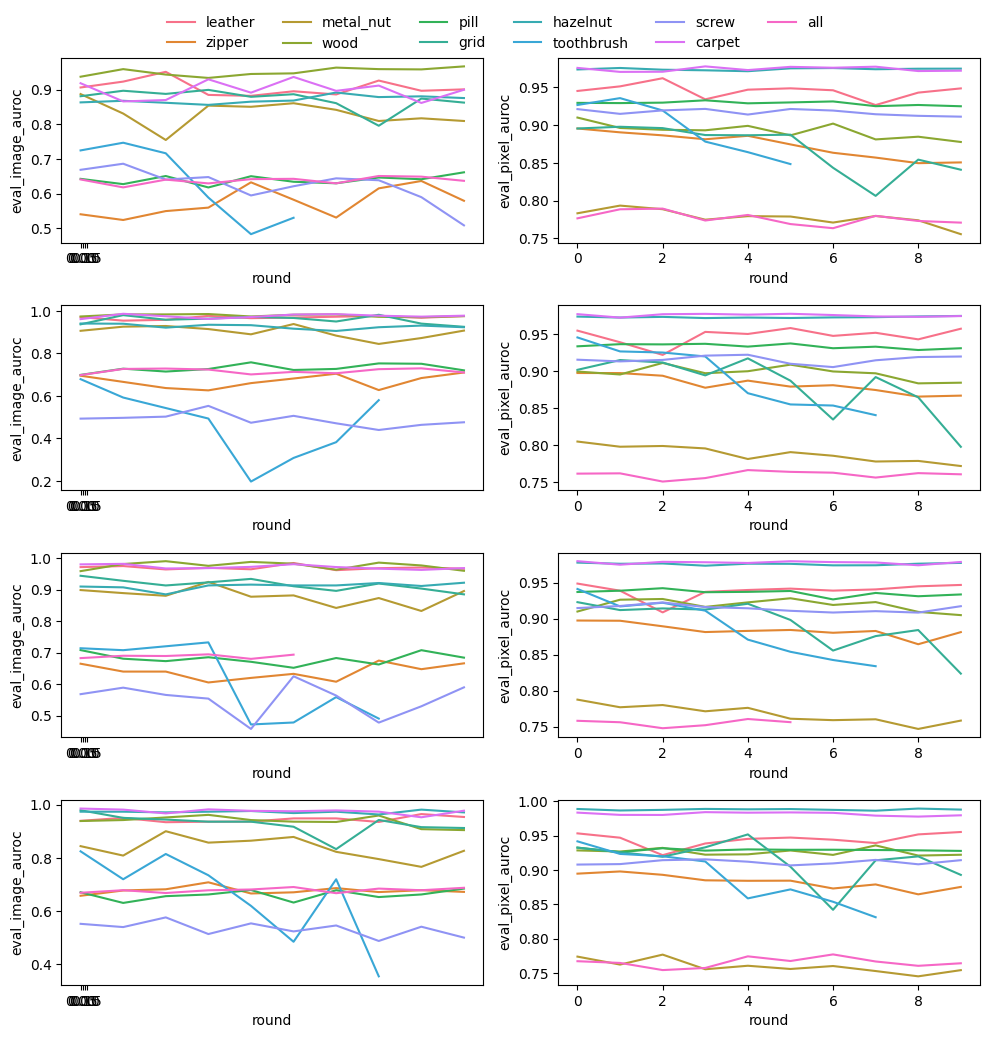

In [13]:
target_columns = ['round', 'epoch', 'eval_image_auroc', 'eval_pixel_auroc']
temp = pd.DataFrame()
for i, name in enumerate(class_name):
    for ratio in anomaly_ratio:
        data_dir = f'results/benchmark/MVTecAD/STPM/resnet18/EntropySampling/{name}/al_ratio_{ratio}-query_10/'
        log_dir = os.path.join(data_dir, 'log.txt')
        df = open_txt(log_dir)
        df = df.loc[df['epoch'] ==29, target_columns]
        df['ratio'] = ratio
        df['name'] = name
        temp = pd.concat([temp,df])
df = temp 

import matplotlib.pyplot as plt
import seaborn as sns

row = 4
col = 2
figsize = (10, 10)
fig, axes = plt.subplots(row, col, figsize=figsize)


for i, (ratio, ax) in enumerate(zip(anomaly_ratio, axes)):
    sns.lineplot(
        x    = 'round',
        y    = 'eval_image_auroc',
        hue  = 'name',
        data = df[df['ratio']==ratio],
        ax   = ax[0]
    )
    
    sns.lineplot(
        x    = 'round',
        y    = 'eval_pixel_auroc',
        hue  = 'name',
        data = df[df['ratio']==ratio],
        ax   = ax[1]
    )

    # Set the x ticks to the desired values
    ax[0].set_xticks(anomaly_ratio)

    # Get the handles and labels of the legend
    if i ==0:
        lines, labels = ax[0].get_legend_handles_labels()
    ax[0].get_legend().remove()
    ax[1].get_legend().remove()

# Create the legend with modified colors
fig.legend(
    lines, labels, ncol=6, loc='lower center', bbox_to_anchor=(0.5, 0.98),
    frameon=False, fontsize=10,
)

plt.tight_layout()
plt.show()
